# **Judul: "Analisis Perbandingan Pola Pembelian Produk Toko Kue Tahun 2016–2017 Menggunakan Algoritma Apriori dalam Market Basket Analysis"**

Business Understanding:

- Produk apa paling sering dibeli di 2016 dan 2017?

- Apakah item populer tetap sama di tiap tahun?

- Apakah ada item baru yang naik drastis di 2017?

# **Input Dataset**

Dataset yang digunakan dalam penelitian ini berasal dari hasil observasi yang tersedia di laman Kaggle, tepatnya pada notebook berikut: https://www.kaggle.com/code/rahmi21/02-association-rule-mining-on-real-data/notebook

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

# Ambil nama file dari dictionary
filename = next(iter(uploaded))

# Baca CSV ke DataFrame
df_MBA = pd.read_csv(io.BytesIO(uploaded[filename]))

# Tampilkan data
print("Data berhasil diimport:")
df_MBA

Saving MBA_BreadBasket.csv to MBA_BreadBasket.csv
Data berhasil diimport:


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


# **Exploratory Data Analysis (EDA)**

## Menampilkan karakteristik data

In [ ]:
df_MBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [ ]:
df_MBA['Transaction'].describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


## Mengecek Item=NONE

In [ ]:
print("Jumlah Item NONE:")
df_MBA[df_MBA['Item'] == 'NONE'].count()

Jumlah Item NONE:


,0
Date,786
Time,786
Transaction,786
Item,786


In [ ]:
#Mengapus Item=NONE karena Tidak Mewakili Produk Nyata
df_MBA = df_MBA.drop(
    df_MBA.loc[df_MBA['Item'] == 'NONE'].index
)
df_MBA.loc[df_MBA['Item'] == 'NONE'].count()

,0
Date,0
Time,0
Transaction,0
Item,0


In [ ]:
df_MBA

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


# **Pre-Processing**

## Splitting data berdasarkan tahun yaitu 2016

In [ ]:
import pandas as pd

# Pastikan kolom 'Date' bertipe datetime
df_MBA['Date'] = pd.to_datetime(df_MBA['Date'])

# Tambahkan kolom 'Year' dari tanggal
df_MBA['Year'] = df_MBA['Date'].dt.year

# Bagi berdasarkan tahun
df_MBA_2016 = df_MBA[df_MBA['Year'] == 2016].copy()
df_MBA_2017 = df_MBA[df_MBA['Year'] == 2017].copy()

In [ ]:
df_MBA_2016

,Date,Time,Transaction,Item,Year
0,2016-10-30,09:58:11,1,Bread,2016
1,2016-10-30,10:05:34,2,Scandinavian,2016
2,2016-10-30,10:05:34,2,Scandinavian,2016
3,2016-10-30,10:07:57,3,Hot chocolate,2016
4,2016-10-30,10:07:57,3,Jam,2016
...,...,...,...,...,...
8556,2016-12-31,15:53:59,4087,Bread,2016
8557,2016-12-31,15:54:56,4088,Tea,2016
8558,2016-12-31,15:54:56,4088,Coke,2016
8559,2016-12-31,17:36:21,4089,Cake,2016


In [ ]:
# Simpan DataFrame df_ahm sebagai file CSV
df_MBA_2016.to_csv('df_MBA_2016.csv', index=False)

In [ ]:
# Hitung frekuensi item untuk df_MBA_2016
basket_items_2016 = {}

for item in df_MBA_2016['Item']:
    if item in basket_items_2016:
        basket_items_2016[item] += 1
    else:
        basket_items_2016[item] = 1

# Buat DataFrame
df_MBA_items_table_2016 = pd.DataFrame({
    'Item': list(basket_items_2016.keys()),
    'Frequency': list(basket_items_2016.values())
}).sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print("Tabel Frekuensi Item 2016:")
df_MBA_items_table_2016

Tabel Frekuensi Item 2016:


,Item,Frequency
0,Coffee,2214
1,Bread,1390
2,Tea,577
3,Pastry,366
4,Medialuna,362
...,...,...
65,Adjustment,1
66,Olum & polenta,1
67,Bacon,1
68,Polenta,1


In [ ]:
# Simpan DataFrame df_ahm sebagai file CSV
df_MBA_items_table_2016.to_csv('df_MBA_items_table_2016.csv', index=False)

## Splitting data berdasarkan tahun 2017

In [ ]:
df_MBA_2017

,Date,Time,Transaction,Item,Year
8561,2017-01-01,01:21:05,4090,Bread,2017
8562,2017-01-03,09:08:01,4094,Coffee,2017
8563,2017-01-03,09:14:31,4095,Coffee,2017
8564,2017-01-03,09:14:31,4095,Toast,2017
8565,2017-01-03,09:17:54,4096,Farm House,2017
...,...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee,2017
21289,2017-04-09,14:32:58,9682,Tea,2017
21290,2017-04-09,14:57:06,9683,Coffee,2017
21291,2017-04-09,14:57:06,9683,Pastry,2017


In [ ]:
# Simpan DataFrame df_ahm sebagai file CSV
df_MBA_2017.to_csv('df_MBA_2017.csv', index=False)

In [ ]:
# Hitung frekuensi item untuk df_MBA_2016
basket_items_2017 = {}

for item in df_MBA_2017['Item']:
    if item in basket_items_2017:
        basket_items_2017[item] += 1
    else:
        basket_items_2017[item] = 1

# Buat DataFrame
df_MBA_items_table_2017 = pd.DataFrame({
    'Item': list(basket_items_2017.keys()),
    'Frequency': list(basket_items_2017.values())
}).sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print("Tabel Frekuensi Item 2017:")
df_MBA_items_table_2017

Tabel Frekuensi Item 2017:


,Item,Frequency
0,Coffee,3257
1,Bread,1935
2,Tea,858
3,Cake,762
4,Sandwich,536
...,...,...
62,Brioche and salami,2
63,Bare Popcorn,2
64,Gift voucher,1
65,Raw bars,1


In [ ]:
# Simpan DataFrame df_ahm sebagai file CSV
df_MBA_items_table_2017.to_csv('df_MBA_items_table_2017.csv', index=False)

## Group items berdasarkan Transaction ID

Bermanfaat untuk mengetahui produk apa saja yang dibeli bersama dalam satu transaksi ditahun 2016 dan 2017

In [ ]:
# Grouping item berdasarkan Transaction ID untuk 2016
transactions_2016 = df_MBA_2016.groupby('Transaction')['Item'].apply(list).reset_index()
print('Group Item berdasarkan Transaction ID tahun 2016: ')
transactions_2016

Group Item berdasarkan Transaction ID tahun 2016: 


,Transaction,Item
0,1,[Bread]
1,2,"[Scandinavian, Scandinavian]"
2,3,"[Hot chocolate, Jam, Cookies]"
3,4,[Muffin]
4,5,"[Coffee, Pastry, Bread]"
...,...,...
3982,4085,[Sandwich]
3983,4086,"[Coffee, Bread]"
3984,4087,[Bread]
3985,4088,"[Tea, Coke]"


In [ ]:
# Simpan DataFrame df_ahm sebagai file CSV
transactions_2016.to_csv('Group_Item_berdasarkan_Transaction_ID_tahun_2016.csv', index=False)

In [ ]:
# Grouping item berdasarkan Transaction ID untuk 2017
transactions_2017 = df_MBA_2017.groupby('Transaction')['Item'].apply(list).reset_index()
print('Group Item berdasarkan Transaction ID tahun 2017: ')
transactions_2017

Group Item berdasarkan Transaction ID tahun 2017: 


,Transaction,Item
0,4090,[Bread]
1,4094,[Coffee]
2,4095,"[Coffee, Toast]"
3,4096,[Farm House]
4,4097,"[Bread, Bread]"
...,...,...
5473,9680,[Bread]
5474,9681,"[Truffles, Tea, Spanish Brunch, Christmas common]"
5475,9682,"[Muffin, Tacos/Fajita, Coffee, Tea]"
5476,9683,"[Coffee, Pastry]"


In [ ]:
# Simpan DataFrame df_ahm sebagai file CSV
transactions_2017.to_csv('Group_Item_berdasarkan_Transaction_ID_tahun_2017.csv', index=False)

## Mengubah Item menjadi List berdasarkan Transaction ID tahun 2016 dan 2017

Untuk Menghitung Kombinasi dan Pola Asosiasi

In [ ]:
# Untuk transactions_2016
transactions_2016['Item'] = transactions_2016['Item'].apply(lambda x: x if isinstance(x, list) else x.split(','))
# Untuk transactions_2017
transactions_2017['Item'] = transactions_2017['Item'].apply(lambda x: x if isinstance(x, list) else x.split(','))

# Hasil akhir: daftar transaksi, masing-masing berisi list item
transactions_list_2016 = transactions_2016['Item'].tolist()
transactions_list_2017 = transactions_2017['Item'].tolist()


In [ ]:
transactions_list_2016

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Tartine', 

In [ ]:
# Gabungkan list item jadi string agar bisa disimpan
transactions_2016['Item'] = transactions_2016['Item'].apply(lambda x: ','.join(x))
# Simpan ke file TSV
transactions_2016.to_csv('transactions_2016.tsv', sep='\t', index=False)


In [ ]:
transactions_list_2017

[['Bread'],
 ['Coffee'],
 ['Coffee', 'Toast'],
 ['Farm House'],
 ['Bread', 'Bread'],
 ['Coffee', 'Coffee'],
 ['Coffee'],
 ['Coffee', 'Coffee', 'Toast'],
 ['Coffee', 'Coffee', 'Coffee'],
 ['Toast', 'Bread'],
 ['Bread'],
 ['Coffee'],
 ['Coffee', 'Coffee', 'Vegan mincepie', 'Vegan mincepie'],
 ['Bread'],
 ['Coffee'],
 ['Coffee', 'Toast'],
 ['Coffee'],
 ['Cookies', 'Cake', 'Bread', 'Coffee'],
 ['Tea', 'Cake'],
 ['Bread'],
 ['Coffee', 'Hot chocolate', 'Cookies'],
 ['Coffee'],
 ['Cake'],
 ['Bread'],
 ['Juice', 'Coffee', 'Sandwich', 'Sandwich'],
 ['Coffee'],
 ['Bread', 'Coffee', 'Frittata', 'Cookies', 'Mineral water'],
 ['Coffee', 'Muffin'],
 ['Sandwich', 'Coffee', 'Cake'],
 ['Coffee'],
 ['Coffee', 'Coffee', 'Vegan mincepie', 'Cake'],
 ['Cake', 'Cake', 'Coffee'],
 ['Coffee'],
 ['Frittata', 'Coffee'],
 ['Sandwich', 'Cookies'],
 ['Tea'],
 ['Tea'],
 ['Tea'],
 ['Bread', 'Vegan mincepie'],
 ['Muffin', 'Coffee', 'Hot chocolate'],
 ['Bread'],
 ['Hot chocolate', 'Coffee', 'Cake'],
 ['Coffee'],
 ['Hot

In [ ]:
# Gabungkan list item jadi string agar bisa disimpan
transactions_2017['Item'] = transactions_2017['Item'].apply(lambda x: ','.join(x))
# Simpan ke file TSV
transactions_2017.to_csv('transactions_2017.tsv', sep='\t', index=False)


# **Encoding**

In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
#Encode data tahun 2016
# Inisialisasi encoder
te_2016 = TransactionEncoder()

# Transform ke array True/False
te_2016_result = te_2016.fit(transactions_list_2016).transform(transactions_list_2016)

# Konversi ke DataFrame
encoded_df_2016 = pd.DataFrame(te_2016_result, columns=te_2016.columns_)
encoded_df_2016

,Adjustment,Alfajores,Art Tray,Bacon,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,...,Spread,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3983,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3984,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3985,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# Simpan DataFrame df_ahm sebagai file CSV
encoded_df_2016.to_csv('encoded_df_2016.csv', index=False)

In [ ]:
# Inisialisasi encoder
te_2017 = TransactionEncoder()

# Transform ke array True/False
te_2017_result = te_2017.fit(transactions_list_2017).transform(transactions_list_2017)

# Konversi ke DataFrame
encoded_df_2017 = pd.DataFrame(te_2017_result, columns=te_2017.columns_)
encoded_df_2017


,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Baguette,Bakewell,Bare Popcorn,Bread,Brioche and salami,Brownie,...,Tacos/Fajita,Tea,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5474,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
5475,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
5476,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Simpan DataFrame df_ahm sebagai file CSV
encoded_df_2017.to_csv('encoded_df_2017.csv', index=False)

# **Algoritma Apriori**

In [ ]:
from mlxtend.frequent_patterns import apriori
# Jalankan Apriori untuk transaksi 2016
frequent_itemsets_2016 = apriori(
    encoded_df_2016,
    min_support=0.03,  # bisa disesuaikan
    use_colnames=True
)

# Tampilkan itemsets
frequent_itemsets_2016.sort_values(by='support', ascending=False)

,support,itemsets
4,0.471282,(Coffee)
1,0.327815,(Bread)
13,0.140707,(Tea)
10,0.089290,(Pastry)
8,0.087534,(Medialuna)
14,0.087033,"(Bread, Coffee)"
3,0.064961,(Cake)
7,0.061951,(Hot chocolate)
11,0.055179,(Sandwich)
17,0.050163,"(Coffee, Medialuna)"


In [ ]:
# Simpan DataFrame df_ahm sebagai file CSV
frequent_itemsets_2016.to_csv('frequent_itemsets_2016.csv', index=False)

In [ ]:
# Jalankan Apriori untuk transaksi 2017
frequent_itemsets_2017 = apriori(
    encoded_df_2017,
    min_support=0.03,  # bisa disesuaikan
    use_colnames=True
)

# Tampilkan itemsets
frequent_itemsets_2017.sort_values(by='support', ascending=False)

,support,itemsets
4,0.483571,(Coffee)
1,0.326762,(Bread)
16,0.144031,(Tea)
3,0.132165,(Cake)
18,0.092187,"(Bread, Coffee)"
12,0.083972,(Sandwich)
11,0.083790,(Pastry)
19,0.070099,"(Cake, Coffee)"
5,0.064622,(Cookies)
7,0.055677,(Hot chocolate)


In [ ]:
# Simpan DataFrame df_ahm sebagai file CSV
frequent_itemsets_2017.to_csv('frequent_itemsets_2017.csv', index=False)

# **Asosiasi Rules Mining**

- antecedents	Item yang menjadi syarat (jika membeli ...)

- consequents	Item yang mungkin dibeli bersama (maka beli ...)

- support	Proporsi transaksi yang mengandung aturan tersebut

- confidence	Kemungkinan beli consequents jika sudah beli antecedents

- lift	Seberapa jauh aturan ini lebih kuat dibanding kebetulan biasa (lift > 1 bagus)

In [ ]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules dengan confidence minimum 0.4
rules_2016 = association_rules(
    frequent_itemsets_2016,
    metric="confidence",
    min_threshold=0.4
)

# Urutkan berdasarkan confidence secara descending
rules_2016_sorted = rules_2016.sort_values(by='confidence', ascending=False)

# Tampilkan aturan asosiasi
rules_2016_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']]


,antecedents,consequents,support,confidence,lift,conviction
2,(Medialuna),(Coffee),0.050163,0.573066,1.215973,1.238407
1,(Hot chocolate),(Coffee),0.032606,0.526316,1.116775,1.116183
3,(Pastry),(Coffee),0.046902,0.525281,1.114580,1.113750
0,(Cake),(Coffee),0.033609,0.517375,1.097803,1.095504


In [ ]:
# Simpan DataFrame df_ahm sebagai file CSV
rules_2016.to_csv('asosiasi_rules_2016.csv', index=False)

In [ ]:
# Generate association rules dengan confidence minimum 0.4
rules_2017 = association_rules(
    frequent_itemsets_2017,
    metric="confidence",
    min_threshold=0.4
)

# Urutkan berdasarkan confidence secara descending
rules_2017_sorted = rules_2017.sort_values(by='confidence', ascending=False)

# Tampilkan aturan asosiasi
rules_2017_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']]


,antecedents,consequents,support,confidence,lift,conviction
4,(Toast),(Coffee),0.033406,0.723320,1.495790,1.866523
2,(Pastry),(Coffee),0.048010,0.572985,1.184904,1.209393
3,(Sandwich),(Coffee),0.046185,0.550000,1.137373,1.147621
0,(Cake),(Coffee),0.070099,0.530387,1.096813,1.099691
1,(Cookies),(Coffee),0.033771,0.522599,1.080708,1.081751


In [ ]:
# Simpan DataFrame df_ahm sebagai file CSV
rules_2017.to_csv('asosiasi_rules_2017.csv', index=False)

# **Visualisasi Data**

In [ ]:
# Contoh: confidence ≥ 0.5 dan lift > 1
rules_filtered_2016 = rules_2016[(rules_2016['confidence'] >= 0.4) & (rules_2016['lift'] > 1)]
rules_filtered_2017 = rules_2017[(rules_2017['confidence'] >= 0.4) & (rules_2017['lift'] > 1)]


In [ ]:
print("Jumlah aturan 2016:", len(rules_filtered_2016))
print("Jumlah aturan 2017:", len(rules_filtered_2017))


Jumlah aturan 2016: 4
Jumlah aturan 2017: 5


In [ ]:
print("Aturan Tahun 2016:")
display(rules_filtered_2016.sort_values(by='confidence', ascending=False)[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']])

print("\nAturan Tahun 2017:")
display(rules_filtered_2017.sort_values(by='confidence', ascending=False)[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']])


Aturan Tahun 2016:


,antecedents,consequents,support,confidence,lift,conviction
2,(Medialuna),(Coffee),0.050163,0.573066,1.215973,1.238407
1,(Hot chocolate),(Coffee),0.032606,0.526316,1.116775,1.116183
3,(Pastry),(Coffee),0.046902,0.525281,1.114580,1.113750
0,(Cake),(Coffee),0.033609,0.517375,1.097803,1.095504



Aturan Tahun 2017:


,antecedents,consequents,support,confidence,lift,conviction
4,(Toast),(Coffee),0.033406,0.723320,1.495790,1.866523
2,(Pastry),(Coffee),0.048010,0.572985,1.184904,1.209393
3,(Sandwich),(Coffee),0.046185,0.550000,1.137373,1.147621
0,(Cake),(Coffee),0.070099,0.530387,1.096813,1.099691
1,(Cookies),(Coffee),0.033771,0.522599,1.080708,1.081751


/tmp/ipython-input-321826769.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-321826769.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


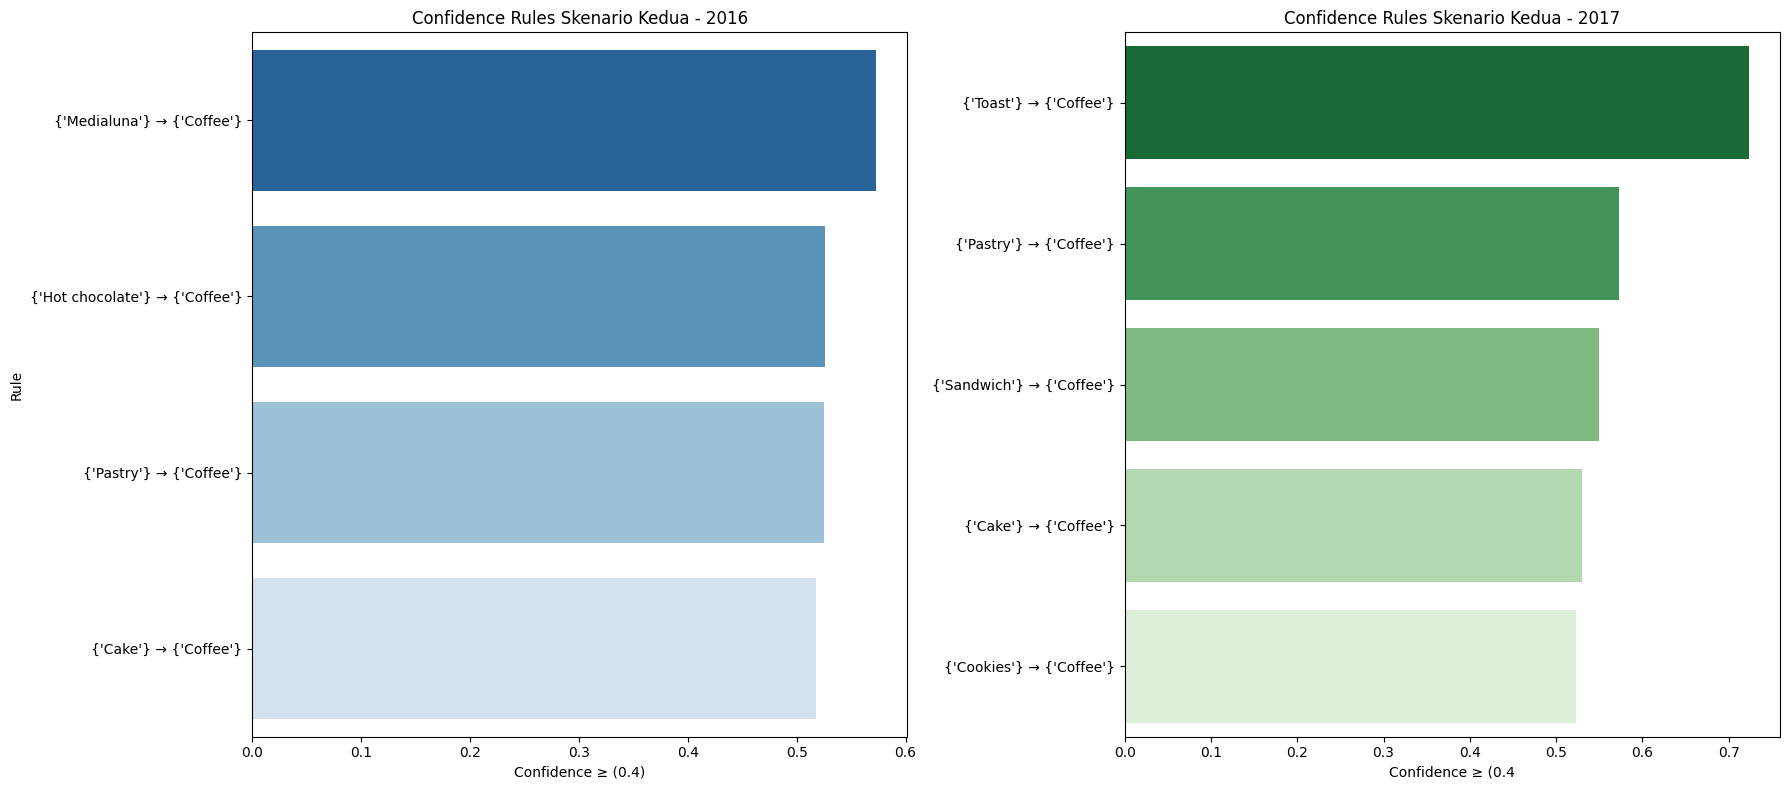

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 10 aturan dengan confidence tertinggi
top_rules_2016 = rules_filtered_2016.sort_values(by='confidence', ascending=False)
top_rules_2017 = rules_filtered_2017.sort_values(by='confidence', ascending=False)

# Konversi frozenset ke string biar bisa ditampilkan
top_rules_2016['Rule'] = top_rules_2016.apply(lambda x: f"{set(x['antecedents'])} → {set(x['consequents'])}", axis=1)
top_rules_2017['Rule'] = top_rules_2017.apply(lambda x: f"{set(x['antecedents'])} → {set(x['consequents'])}", axis=1)

# Buat plot
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(
    data=top_rules_2016,
    y='Rule', x='confidence', ax=axes[0], palette='Blues_r'
)
axes[0].set_title('Confidence Rules Skenario Kedua - 2016')
axes[0].set_xlabel('Confidence ≥ (0.4)')
axes[0].set_ylabel('Rule')

sns.barplot(
    data=top_rules_2017,
    y='Rule', x='confidence', ax=axes[1], palette='Greens_r'
)
axes[1].set_title('Confidence Rules Skenario Kedua - 2017')
axes[1].set_xlabel('Confidence ≥ (0.4')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# **Perhitungan Manual 3 itemset**

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Generate frequent itemsets dengan min_support = 0.03
frequent_itemsets_2016 = apriori(encoded_df_2016, min_support=0.03, use_colnames=True)

# 2. Tambahkan kolom panjang itemset
frequent_itemsets_2016['length'] = frequent_itemsets_2016['itemsets'].apply(lambda x: len(x))

# 3. Filter untuk 3-itemsets
three_itemsets_2016 = frequent_itemsets_2016[frequent_itemsets_2016['length'] == 3]

# 4. Tampilkan 3-itemsets yang support-nya ≥ 0.03
three_itemsets_2016_sorted = three_itemsets_2016.sort_values(by='support', ascending=False).reset_index(drop=True)

print("Contoh Frequent 3-Itemsets Tahun 2016 (Support ≥ 0.03):")
display(three_itemsets_2016_sorted)

# 5. Generate association rules dengan min_confidence = 0.4
rules_2016 = association_rules(frequent_itemsets_2016, metric='confidence', min_threshold=0.4)

# 6. Filter hanya aturan dengan total 3 item (antecedents + consequents = 3)
rules_3item_2016 = rules_2016[
    (rules_2016['antecedents'].apply(lambda x: len(x)) +
     rules_2016['consequents'].apply(lambda x: len(x)) == 3)
]

# 7. Urutkan berdasarkan confidence
rules_3item_2016_sorted = rules_3item_2016.sort_values(by='confidence', ascending=False).reset_index(drop=True)

print("Contoh Association Rules 3-Itemsets Tahun 2016 (Confidence ≥ 0.4):")
display(rules_3item_2016_sorted)

Contoh Frequent 3-Itemsets Tahun 2016 (Support ≥ 0.03):


,support,itemsets,length


Contoh Association Rules 3-Itemsets Tahun 2016 (Confidence ≥ 0.4):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Generate frequent itemsets dengan min_support = 0.03
frequent_itemsets_2017 = apriori(encoded_df_2017, min_support=0.03, use_colnames=True)

# 2. Tambahkan kolom panjang itemset
frequent_itemsets_2017['length'] = frequent_itemsets_2017['itemsets'].apply(lambda x: len(x))

# 3. Filter untuk 3-itemsets
three_itemsets_2017 = frequent_itemsets_2017[frequent_itemsets_2017['length'] == 3]

# 4. Tampilkan 3-itemsets yang support-nya ≥ 0.03
three_itemsets_2017_sorted = three_itemsets_2017.sort_values(by='support', ascending=False).reset_index(drop=True)

print("Contoh Frequent 3-Itemsets Tahun 2016 (Support ≥ 0.03):")
display(three_itemsets_2017_sorted)

# 5. Generate association rules dengan min_confidence = 0.4
rules_2017 = association_rules(frequent_itemsets_2017, metric='confidence', min_threshold=0.4)

# 6. Filter hanya aturan dengan total 3 item (antecedents + consequents = 3)
rules_3item_2017 = rules_2017[
    (rules_2017['antecedents'].apply(lambda x: len(x)) +
     rules_2017['consequents'].apply(lambda x: len(x)) == 3)
]

# 7. Urutkan berdasarkan confidence
rules_3item_2017_sorted = rules_3item_2017.sort_values(by='confidence', ascending=False).reset_index(drop=True)

print("Contoh Association Rules 3-Itemsets Tahun 2017 (Confidence ≥ 0.4):")
display(rules_3item_2017_sorted)

Contoh Frequent 3-Itemsets Tahun 2016 (Support ≥ 0.03):


,support,itemsets,length


Contoh Association Rules 3-Itemsets Tahun 2017 (Confidence ≥ 0.4):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
